## Mantención Reactiva en Manufactura usando DA

In [37]:
__author__ = "Marcelo Gallegos"

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
np.random.seed(seed=4)

In [40]:
equipo_modelo = pd.DataFrame(np.random.normal(size=(100,20)))

In [41]:
equipos = {'equipo_'+str(i):[] for i in range(1,51)}
for i in range(1,51):
    loc = np.random.uniform(0,1)
    scale = np.random.uniform(0,1)
    df = equipo_modelo+pd.DataFrame(np.random.normal(loc=loc,scale=scale,size=(100,20)))
    equipos['equipo_'+str(i)] = df

In [42]:
for equipo in equipos:
    print(f"Nivel Correlacion de {equipo} respecto a equipoModelo:", round(equipo_modelo.corrwith(equipos[equipo],axis=1).sum(),2))

Nivel Correlacion de equipo_1 respecto a equipoModelo: 87.7
Nivel Correlacion de equipo_2 respecto a equipoModelo: 71.26
Nivel Correlacion de equipo_3 respecto a equipoModelo: 78.08
Nivel Correlacion de equipo_4 respecto a equipoModelo: 71.12
Nivel Correlacion de equipo_5 respecto a equipoModelo: 96.42
Nivel Correlacion de equipo_6 respecto a equipoModelo: 86.8
Nivel Correlacion de equipo_7 respecto a equipoModelo: 91.23
Nivel Correlacion de equipo_8 respecto a equipoModelo: 71.89
Nivel Correlacion de equipo_9 respecto a equipoModelo: 81.69
Nivel Correlacion de equipo_10 respecto a equipoModelo: 90.4
Nivel Correlacion de equipo_11 respecto a equipoModelo: 78.45
Nivel Correlacion de equipo_12 respecto a equipoModelo: 76.42
Nivel Correlacion de equipo_13 respecto a equipoModelo: 91.47
Nivel Correlacion de equipo_14 respecto a equipoModelo: 77.97
Nivel Correlacion de equipo_15 respecto a equipoModelo: 98.69
Nivel Correlacion de equipo_16 respecto a equipoModelo: 97.52
Nivel Correlacion de

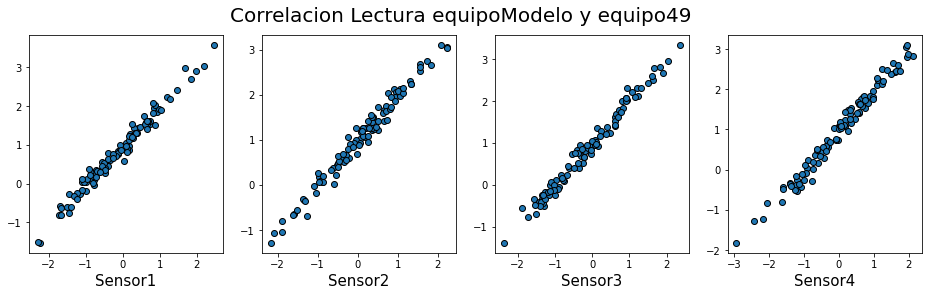

In [43]:
#Equipo con mayor nivel de correlación (Equipo_49, r=0.99)

fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Correlacion Lectura equipoModelo y equipo49", fontsize=20,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(equipo_modelo.loc[:,i],equipos['equipo_49'].loc[:,i],edgecolor='k')
    ax[i].set_xlabel(f"Sensor{i+1}",fontsize=15)
plt.show()

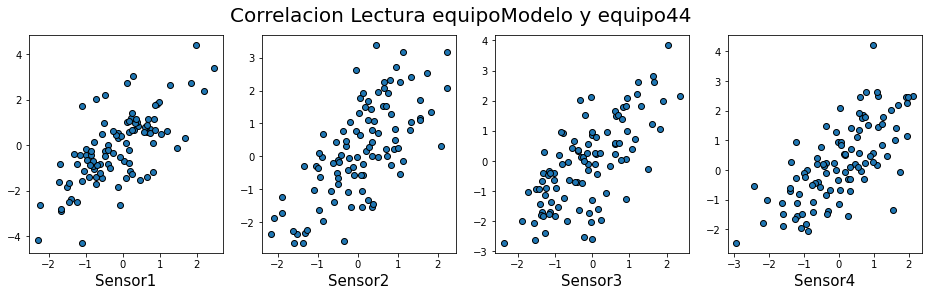

In [44]:
#Equipo con menor nivel de correlación (Equipo_44, r=0.68)

fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Correlacion Lectura equipoModelo y equipo44", fontsize=20,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(equipo_modelo.loc[:,i],equipos['equipo_44'].loc[:,i],edgecolor='k')
    ax[i].set_xlabel(f"Sensor{i+1}",fontsize=15)
plt.show()

In [45]:
p_correlacion = {'equipo_'+str(i):[] for i in range(1,11)}
for equipo in equipos:
    puntaje = round(equipo_modelo.corrwith(equipos[equipo],axis=1).sum(),2)
    p_correlacion[equipo] = puntaje

In [53]:
def color_vals(x):
    if x > 90:
        return 'forestgreen'
    elif x > 80:
        return 'yellow'
    else:
        return 'firebrick'

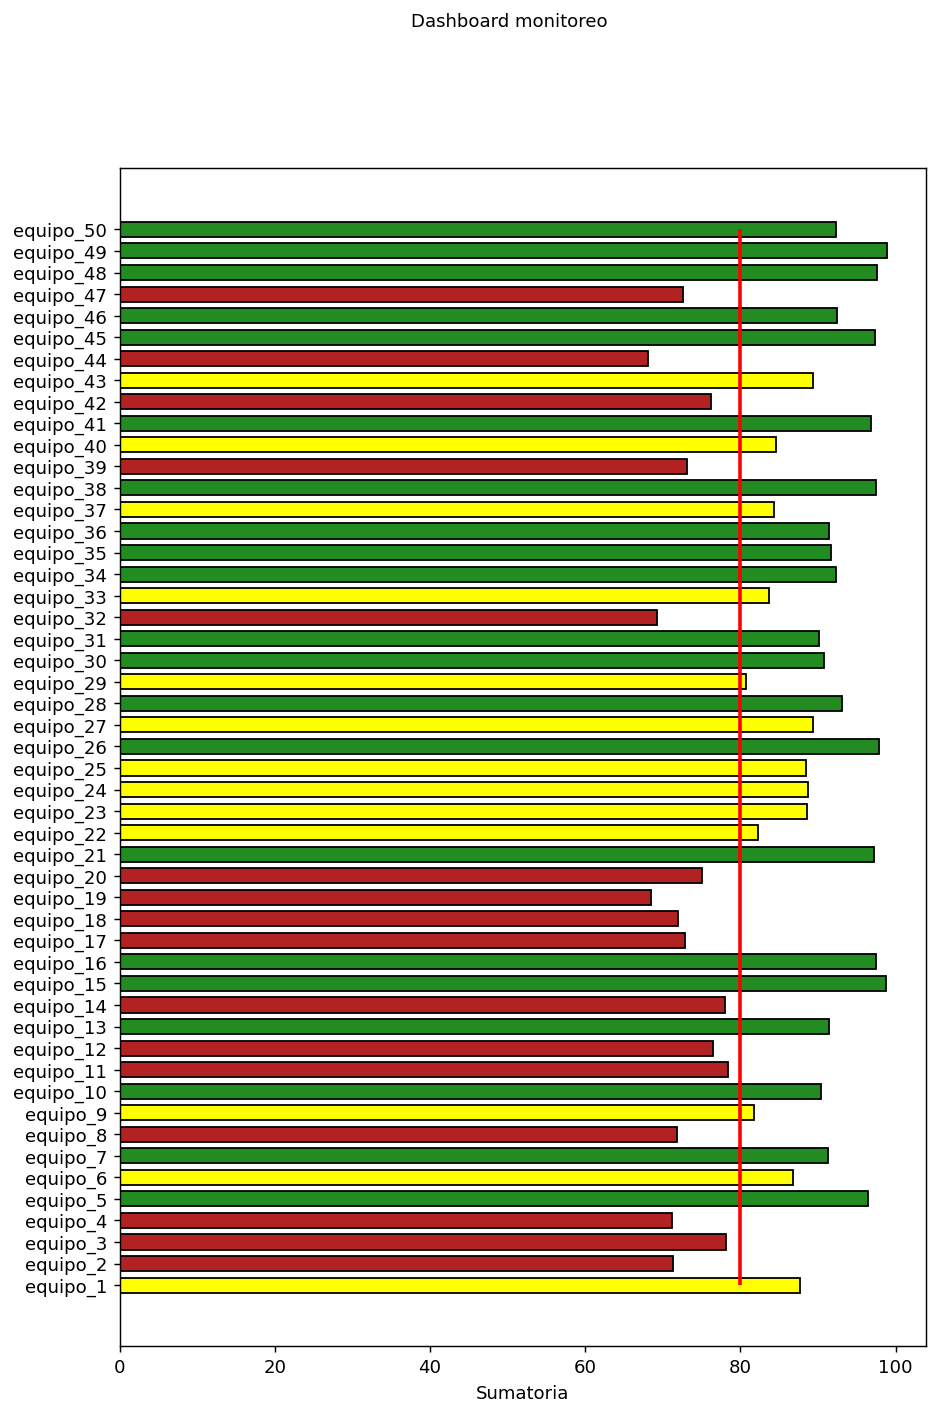

In [54]:
plt.figure(figsize=(8,12),dpi=130)
plt.suptitle("Dashboard monitoreo",fontsize=10,va='top')
plt.barh(y=list(p_correlacion.keys()),width = p_correlacion.values(), 
         color=list(map(color_vals,list(p_correlacion.values()))), edgecolor='k',height=0.7)
plt.vlines(x=80,ymin='equipo_1',ymax='equipo_50',
           linewidth=2,color='red',linestyle='solid')
plt.xlabel("Sumatoria")
plt.show()